In [56]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv("Sales_Data.csv");
old_sales = data['Old Scheme (in thousands)']
#old_sales
new_sales = data['New Scheme (in thousands)']
#new_sales

In [25]:
mean_old = old_sales.mean()
mean_new = new_sales.mean()
print('old-mean: ', mean_old, 'new-mean: ', mean_new)

old-mean:  68.03333333333333 new-mean:  72.03333333333333


In [39]:
# For checking equality of variance between groups
# Null Hypothesis: Variances are equal
levene(old_sales,new_sales)

LeveneResult(statistic=1.063061539437244, pvalue=0.30679836081811235)

In [40]:
shapiro(old_sales)

(0.9885101914405823, 0.9813658595085144)

In [42]:
shapiro(new_sales)

(0.9687567353248596, 0.5057420134544373)

In [43]:
# two-sample t-test
# null hypothesis: the two groups have the same mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene) - done above
# whether both the distributions follow normal distribution - Shapiro test - done above, separately for old_sales & new_sales
# dependent groups: e.g., how the same sales force fare for 2 different schemes
t_statistic, p_value = ttest_ind(old_sales, new_sales)
print(t_statistic, p_value)

-0.6937067608923764 0.49063515686248105


In [31]:
# p_value > 0.05 => null hypothesis: they have the same mean at the 5% significance level. 
# So There is no significant difference between the two means
# there is not significant raise in the output by the new sales incentive scheme
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.49063515686248105


In [32]:
# two-sample wilcoxon test
# a.k.a Mann Whitney U - Used when samples are not normally distributed
u, p_value = mannwhitneyu(old_sales, new_sales)
print ("two-sample wilcoxon-test p-value=", p_value)
# here also the p_value > .05. Hence at 5% significance level, we accept the null hypothesis that the means are similar (not significantly different)

two-sample wilcoxon-test p-value= 0.24815395764270332


In [63]:
# Question
# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is: 
#   1. The probability of a type 1 error? (2.5 points)

alpha = 0.05
print ('Probablity of Type 1 error = level of significance = alpha:', alpha)

Probablity of Type 1 error = level of significance = alpha: 0.05


In [38]:
# Question
# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is: 
#   1. The probability of a type 1 error? (2.5 points)
#   2. What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points)
#   3. Power of the test (5 points)

# Null Hypothesis: New Sales Expected value is: old_sale mean + 5 (thousand) = 73.03333333333
expected_sales_value = mean_old + 5
# Now we need to test the above null hypothesis with 5% significance
t_statistic, p_value = ttest_1samp(new_sales, expected_sales_value)
print('t_statistic: ', t_statistic, 'p_value: ', p_value)



t_statistic:  -0.22762595274354191 p_value:  0.8215342661375444


In [47]:
# one sample wilcoxon-test. p > .05 => accepting null hypothesis that new sales expected value is old_sale mean + 5000 POUND
print("expected_sales_value: ", expected_sales_value)
z_statistic, p_value = wilcoxon(new_sales - expected_sales_value) 
print ("One-Sample z_statistic", z_statistic)
print ("one-sample wilcoxon-test p-value", p_value)

expected_sales_value:  73.03333333333333
One-Sample z_statistic 219.0
one-sample wilcoxon-test p-value 0.7812467987079994


In [51]:
# Calculating Power of Test
# Compute the difference in Means between Population and Sample and divide it by Standard Deviation
# Set the number of Observations
# Set the alpha value and alternative values 'two-sided' , 'larger' , 'smaller'

pot_stat = (np.mean(new_sales) - expected_sales_value) / np.std(new_sales)
print('pot_stat: ', pot_stat)

pot_stat:  -0.042269078272585636


In [54]:
print(ttest_power(pot_stat, nobs=30, alpha=0.05, alternative='two-sided'))

0.05576508681893363


In [62]:
print(ttest_power(pot_stat, nobs=30, alpha=0.05, alternative='larger'))

0.03066951315752864


In [59]:
# paired t-test: doing two measurments on the same experimental unit
# e.g., before and after a treatment
t_statistic, p_value = ttest_1samp(new_sales - old_sales, 0)
print(t_statistic, p_value)

1.5559143823544377 0.13057553961337662


In [60]:
# p > 0.05 => null hypothesis:
# the difference in mean is not significantly different. Hence new sales is not significantly better than old_sales
print ("paired t-test p-value=", p_value)

paired t-test p-value= 0.13057553961337662


In [65]:
# Calculating Power of Test
# Compute the difference in Means between 2 sample means and divide by pooled Standard Deviation 
# number of Observations/tuples
# Set the alpha value to 0.05 and alternative values 'two-sided' , 'larger' , 'smaller'
pot_pooled = (np.mean(new_sales) - np.mean(old_sales)) / np.sqrt(((30-1)*np.var(new_sales)+(30-1)*np.var(old_sales)) / 30+30-2)

0.12909555513169643


In [66]:
print(ttest_power(pot_pooled, nobs=30, alpha=0.05, alternative='two-sided'))

0.10506757964046301


In [67]:
print(ttest_power(pot_pooled, nobs=30, alpha=0.05, alternative='larger'))

0.16999561639014926


(array([2., 3., 2., 3., 6., 4., 5., 2., 1., 2.]),
 array([ 28. ,  36.2,  44.4,  52.6,  60.8,  69. ,  77.2,  85.4,  93.6,
        101.8, 110. ]),
 <a list of 10 Patch objects>)

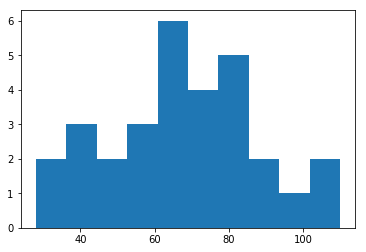

In [58]:
plt.hist(old_sales)